In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_excel('StressLevelDataset.xlsx')

# Display the first few rows of the dataset to understand its structure
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,academic_performance
0,14,20,0,11,2,1,2,4,2,3,...,2,2,3,3,2,3,3,2,1,3
1,15,8,1,15,5,3,1,4,3,1,...,2,4,1,5,1,4,5,5,2,1
2,12,18,1,14,2,1,2,2,2,2,...,2,3,3,2,2,3,2,2,1,2
3,16,12,1,15,4,3,1,3,4,2,...,2,4,1,4,1,4,4,5,2,2
4,16,28,0,7,2,3,5,1,3,2,...,3,3,1,2,1,5,0,5,1,4


In [6]:
# Preprocess the data
# Label encode the target variable (assuming 'academic_performance' is the target column)
le = LabelEncoder()
df['academic_performance'] = le.fit_transform(df['academic_performance'])

# Split the dataset into features (X) and target variable (y)
X = df.drop('academic_performance', axis=1)
y = df['academic_performance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display other evaluation metrics
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)


Accuracy: 49.09%

Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.25      0.24         8
           1       0.42      0.49      0.45        51
           2       0.57      0.52      0.55       109
           3       0.52      0.52      0.52        52
           4       0.48      0.47      0.48        57
           5       0.45      0.45      0.45        53

    accuracy                           0.49       330
   macro avg       0.44      0.45      0.45       330
weighted avg       0.50      0.49      0.49       330


Confusion Matrix:
[[ 2  0  2  0  2  2]
 [ 1 25 23  0  1  1]
 [ 2 27 57 23  0  0]
 [ 0  5 15 27  2  3]
 [ 4  0  1  2 27 23]
 [ 0  3  2  0 24 24]]


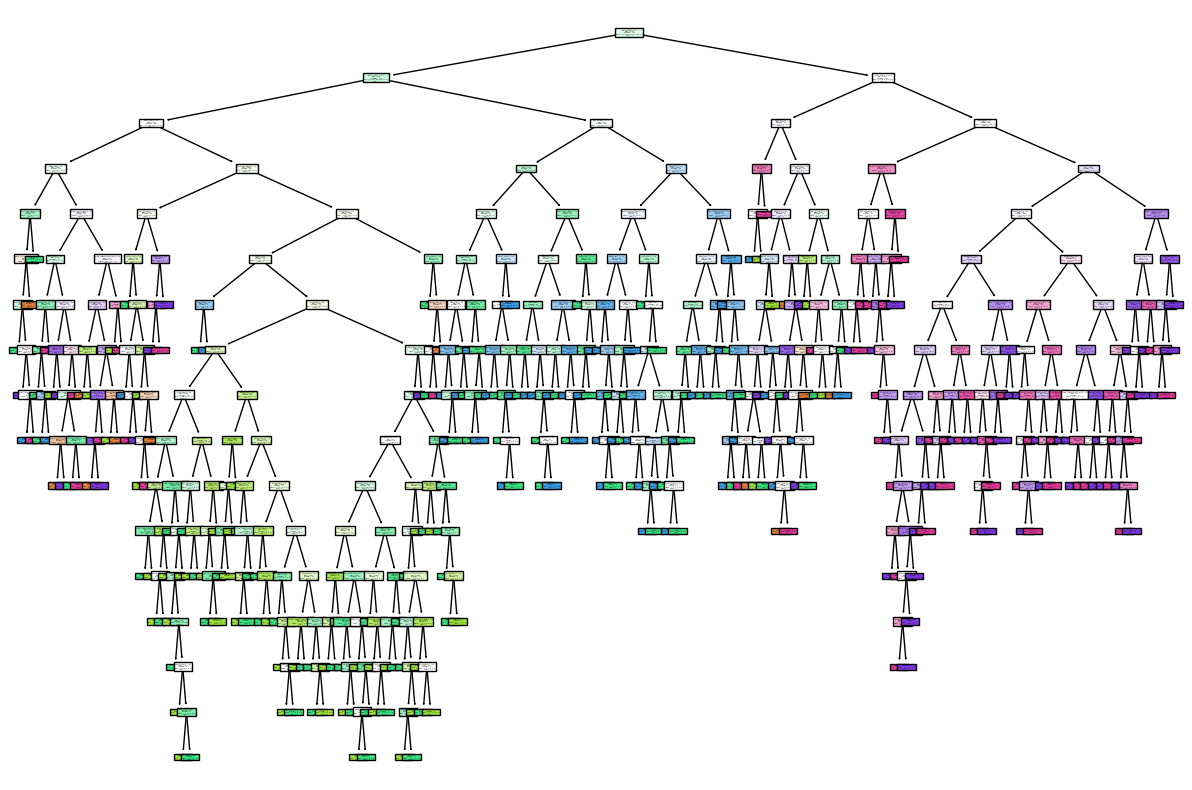

In [7]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=[str(x) for x in le.classes_], filled=True)
plt.show()